# Análisis de campañas de alivio financiero y propuesta para recuperación de cartera vencida en una entidad financiera

## Breve descripción y alcance del proyecto

En el presente proyecto, se realiza el análisis de los datos correspondientes a una campaña que realiza la entidad financiera, a la cual se la referirá mediante el nombre ficticio ***Banco XYZ***, con el fin de recuperar al menos un 60% de su cartera vencida.

Este inconveniente le afecta al Banco dado que en el último semestre ha existido una baja de más del 15% en utilidades en comparación con el período anterior y se ha determinado mediante los reportes de auditoría interna que el **Departamento de Cobranzas** es uno de los que más fuertemente han contibuído a este déficit en las utilidades.

Una de las principales razones que generan las pérdidas en este departamento es la **Gestión de cartera vencida*, razón por la cual se realiza este análisis sobre las campañas de alivio financiero ofertadas previamente por el banco, llamadas *diferimiento* y *normalización*, mismas que han tenido baja efectividad en cuanto a recuperación monetaria frente a las metas previamente establecida.

Se van a responder a las siguientes preguntas para poder entender de mejor manera cuál es el problema actual, sus causas y de que manera se podría brindar una solución que satizfaga las necesidades del **Departamento de Cobranzas del Banco XYZ** sin descuidar el bienestar del cliente:

1. ¿Qué perfiles de clientes están siendo atendidos por cada campaña y canal?
2. ¿Cómo se distribuye la deuda según diferentes variables de análisis?
2. ¿Cómo podría optimizarse el enfoque actual para mejorar la efectividad de las campañas?

Para ofrecer una posible solución al **Departamento de Cobranzas** se va a centrar el enfoque en base a que tipos de perfiles tienen mayor deuda, por más tiempo, dónde se concentran más deudores demográficamente, si es que es necesario modificar las campañas actualmente ofrecidas por el Banco, ofrecer incentivos a los clientes para que se pongan al días con sus deudas de igual manera en base a determinados parámetros o variables, etc.

**Nota:** *A lo largo del presente reporte se analizan datos reales, mismos que han sido debidamente ofuscados y/u omitidos intencionalmente con el fin de proteger posible información sensible, así como por mantener respeto y apego hacia las leyes de protección de datos tanto locales como internacionales.*

## Importación inicial de librerías y carga del **dataset**

Se importa la librería *pandas*, se carga el dataset y se muestran sus parámetros descriptivos incluyendo sus primeras filas, información general de tipos de datos, evaluación inicial de valores nulos, así como estadísticas descriptivas preliminares que otorga esta librería.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_morosidad = pd.read_csv("df_morosidad.csv")

## Limpieza y preprocesamiento de la información

En este análisis se va a revisar la calidad y consistencia de la información de entrada, incluyendo la posible existencia de valores nulos o en blanco, datos atípicos, entre otros.

In [3]:
df_morosidad.head()

,codigo_cliente,rango_morosidad,monto_credito,monto_por_vencer,monto_vencido,intereses,producto_host,dias_mora,gestor,recibe_sueldo_fijo,provincia_cliente,region,sector_general
0,DNI-9502992,31 - 60 DIAS,8000.0,5946.52,0.00,143.94,PRECISO,36,RED COMERCIAL,SÍ,PICHINCHA,SIERRA,SECTOR PÚBLICO
1,DNI-5110681,16 - 30 DIAS,5671.0,0.00,94.16,98.97,PRECISO,22,DIGITAL,NO,PICHINCHA,SIERRA,TRANSPORTE Y LOGÍSTICA
2,DNI-6527606,6 - 15 DIAS,5010.0,0.00,76.97,148.94,PRECISO,10,DIGITAL,NO,GUAYAS,COSTA,COMERCIO
3,DNI-5095519,16 - 30 DIAS,5000.0,0.00,146.04,65.76,PRECISO,23,DIGITAL,NO,PICHINCHA,SIERRA,COMERCIO
4,DNI-9856629,16 - 30 DIAS,6677.0,5511.13,0.00,127.39,PRECISO,28,RED COMERCIAL,NO,PICHINCHA,SIERRA,SERVICIOS


In [4]:
df_morosidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   codigo_cliente      4115 non-null   object 
 1   rango_morosidad     4115 non-null   object 
 2   monto_credito       4115 non-null   float64
 3   monto_por_vencer    4115 non-null   float64
 4   monto_vencido       4115 non-null   float64
 5   intereses           4115 non-null   float64
 6   producto_host       4115 non-null   object 
 7   dias_mora           4115 non-null   int64  
 8   gestor              4115 non-null   object 
 9   recibe_sueldo_fijo  4115 non-null   object 
 10  provincia_cliente   4090 non-null   object 
 11  region              4115 non-null   object 
 12  sector_general      4115 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 418.1+ KB


In [5]:
df_morosidad.describe()

,monto_credito,monto_por_vencer,monto_vencido,intereses,dias_mora
count,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000
mean,9878.836612,3740.186309,62.604493,165.204522,26.249332
std,11170.864163,7052.096389,134.845050,181.270760,13.370148
min,1132.000000,0.000000,0.000000,9.210000,10.000000
25%,4449.500000,0.000000,0.000000,60.200000,15.000000
50%,7000.000000,1481.000000,0.000000,113.110000,23.000000
75%,11102.500000,5207.490000,89.695000,204.440000,35.000000
max,205400.000000,136155.740000,3292.470000,2439.470000,60.000000


### Verificación de posibles valores blancos o nulos

In [6]:
df_morosidad.isna().sum()

codigo_cliente         0
rango_morosidad        0
monto_credito          0
monto_por_vencer       0
monto_vencido          0
intereses              0
producto_host          0
dias_mora              0
gestor                 0
recibe_sueldo_fijo     0
provincia_cliente     25
region                 0
sector_general         0
dtype: int64

Se puede ver en la celda anterior que de manera preliminar únicamente existen valores nulos en la variable *provincia_cliente* dentro del presente conjunto de datos, sin embargo si estos registros se eliminan se estaría subestimando la deuda que el Banco debe recuperar.

### Verificación de posibles valores inconsistentes

Se realiza un análisis de los valores únicos por cada columna para determinar si podría resultar conveniente convertirlos al tipo categórico de pandas.

In [7]:
df_morosidad.dtypes

codigo_cliente         object
rango_morosidad        object
monto_credito         float64
monto_por_vencer      float64
monto_vencido         float64
intereses             float64
producto_host          object
dias_mora               int64
gestor                 object
recibe_sueldo_fijo     object
provincia_cliente      object
region                 object
sector_general         object
dtype: object

In [8]:
condiciones = [
    (df_morosidad["dias_mora"] >= 10) & (df_morosidad["dias_mora"] <= 20),
    (df_morosidad["dias_mora"] >= 21) & (df_morosidad["dias_mora"] <= 60)
]

resultados = ["NORMALIZACIÓN", "DIFERIMIENTO"]
df_morosidad["tipo_campania"] = np.select(condiciones, resultados, default="NO_APLICA")

In [9]:
posibles_columnas_categoricas = [
    "rango_morosidad",
    "producto_host",
    "gestor",
    "recibe_sueldo_fijo",
    "provincia_cliente",
    "region",
    "sector_general",
    "tipo_campania"
]

for col in posibles_columnas_categoricas:
    print(f'Valores únicos en "{col}":')
    print(df_morosidad[col].unique())
    print("-" * 50)

Valores únicos en "rango_morosidad":
['31 - 60 DIAS' '16 - 30 DIAS' '6 - 15 DIAS']
--------------------------------------------------
Valores únicos en "producto_host":
['PRECISO' 'AUTOS' 'PRODUCTO MUJER' 'PRODUCTIVO' 'MICROFINANZAS' 'HABITAR']
--------------------------------------------------
Valores únicos en "gestor":
['RED COMERCIAL' 'DIGITAL']
--------------------------------------------------
Valores únicos en "recibe_sueldo_fijo":
['SÍ' 'NO']
--------------------------------------------------
Valores únicos en "provincia_cliente":
['PICHINCHA' 'GUAYAS' 'LOS RIOS' 'SANTO DOMINGO DE LOS TSACHILAS'
 'SUCUMBIOS' 'MANABI' nan 'EL ORO' 'CHIMBORAZO' 'AZUAY' 'ORELLANA' 'NAPO'
 'ESMERALDAS' 'TUNGURAHUA' 'ZAMORA CHINCHIPE' 'PASTAZA' 'GALAPAGOS'
 'BOLIVAR' 'IMBABURA' 'LOJA' 'COTOPAXI' 'SANTA ELENA' 'CAÑAR'
 'MORONA SANTIAGO' 'CARCHI']
--------------------------------------------------
Valores únicos en "region":
['SIERRA' 'COSTA' 'AMAZONIA' 'NO_ESPECIFICADO' 'GALAPAGOS']
-----------------

Se puede observar que no existen valores inconsistentes al haber analizado los valores únicos en cada columna las columnas o variables ***rango_morosidad***, ***producto_host***, ***gestor***, ***recibe_sueldo_fijo***, ***region*** y ***sector_general*** pueden convertirse a un tipo de variable categórico. Además la variable ***recibe_sueldo_fijo*** puede convertirse a binaria para un procesamiento más eficiente.

In [10]:
df_morosidad[posibles_columnas_categoricas] = df_morosidad[posibles_columnas_categoricas].astype("category")
df_morosidad["recibe_sueldo_fijo"] = df_morosidad["recibe_sueldo_fijo"]\
    .map({"SI": True, "NO": False}).astype("bool")

In [11]:
df_morosidad.dtypes

codigo_cliente          object
rango_morosidad       category
monto_credito          float64
monto_por_vencer       float64
monto_vencido          float64
intereses              float64
producto_host         category
dias_mora                int64
gestor                category
recibe_sueldo_fijo        bool
provincia_cliente     category
region                category
sector_general        category
tipo_campania         category
dtype: object

Se verifican también los valores mínimos y máximos con el fin de entender cuáles de los valores no pueden ser igual a cero (0).

**Valores numéricos mínimos:**

In [12]:
df_morosidad.select_dtypes(include="number").min().apply(lambda x: f"{x:,.2f}")

monto_credito       1,132.00
monto_por_vencer        0.00
monto_vencido           0.00
intereses               9.21
dias_mora              10.00
dtype: object

**Valores numéricos máximos:**

In [13]:
df_morosidad.select_dtypes(include="number").max().apply(lambda x: f"{x:,.2f}")

monto_credito       205,400.00
monto_por_vencer    136,155.74
monto_vencido         3,292.47
intereses             2,439.47
dias_mora                60.00
dtype: object

**Diferencia absoluta entre monto vencido y monto por vencer:**

In [14]:
np.min(np.abs(df_morosidad["monto_por_vencer"] - df_morosidad["monto_vencido"]))

0.3

## Análisis exploratorio de datos

Se va a realizar en primer lugar un análisis gráfico para entender de forma preliminar dónde se concentra la mayor cantidad de clientes en estado de mora.

### Clientes por tipo de campaña

Se realiza un análisis preliminar de clientes por tipo de campaña, tanto a nivel general, sí como por canal de atención, según si reciben o no un sueldo fijo, y según el sector económico al que pertenecen. Este análisis se lo realiza para entender de manera preliminar dónde se concentra la mayor cantidad de clientes en base a ambas campañas que va a realizar el área de cobranzas del Banco.

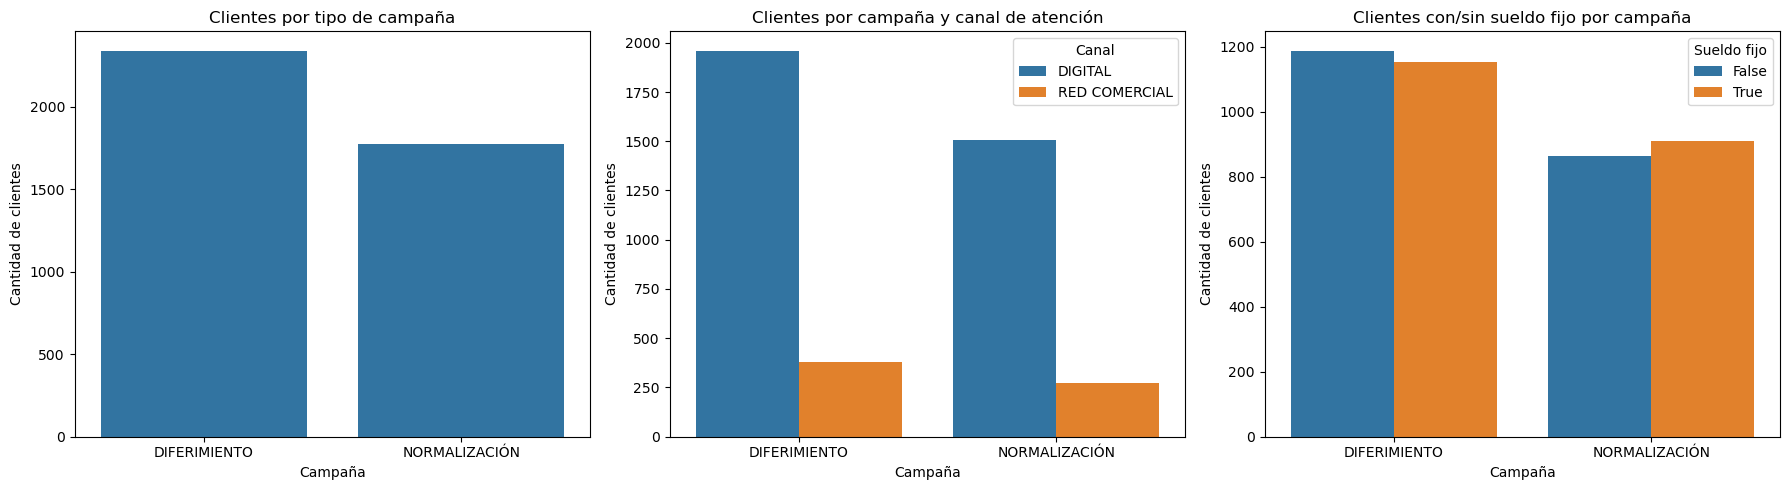

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(
    data=df_morosidad,
    x="tipo_campania",
    ax=axes[0]
)
axes[0].set_title("Clientes por tipo de campaña")
axes[0].set_ylabel("Cantidad de clientes")
axes[0].set_xlabel("Campaña")

sns.countplot(
    data=df_morosidad,
    x="tipo_campania",
    hue="gestor",
    ax=axes[1]
)
axes[1].set_title("Clientes por campaña y canal de atención")
axes[1].set_ylabel("Cantidad de clientes")
axes[1].set_xlabel("Campaña")
axes[1].legend(title="Canal")

sns.countplot(
    data=df_morosidad,
    x="tipo_campania",
    hue="recibe_sueldo_fijo",
    ax=axes[2]
)
axes[2].set_title("Clientes con/sin sueldo fijo por campaña")
axes[2].set_ylabel("Cantidad de clientes")
axes[2].set_xlabel("Campaña")
axes[2].legend(title="Sueldo fijo")

plt.tight_layout()
plt.show()

Según se puede observar, la mayor parte de clientes se concentra en campañas de diferimiento, es decir cuando la deuda vencida es la predominante, sin embargo se ve que en campañas de diferimiento hay una proporción más alta de clientes en mora frente a normalización, y por último se observa una distribución similar en cuanto a si los clientes reciben o no sueldo fijo.

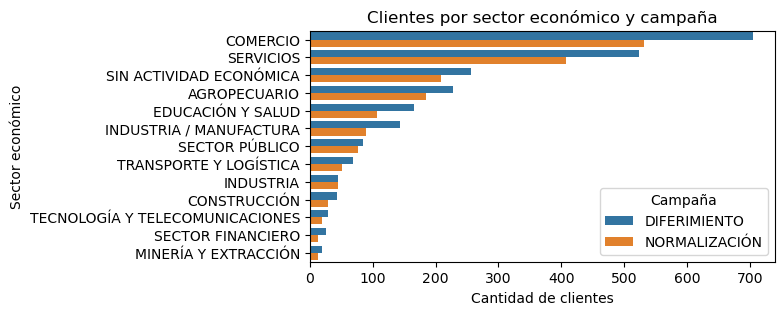

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(
    data=df_morosidad,
    y="sector_general",
    hue="tipo_campania",
    order=df_morosidad["sector_general"].value_counts().index
)
plt.title("Clientes por sector económico y campaña")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Sector económico")
plt.legend(title="Campaña")
plt.show()

Se puede observar que en la campaña de **DIFERIMIENTO** predominan deudas bajas entre USD 100 y USD 500 aproximadamente, con variabilidad relativamente baja al existir pocos valores extremos.

Por otro lado, en el caso de la campaña de **NORMALIZACIÓN** el monto vencido promedio se muestra ligeramente más alto, con una mayor presencia de valores atípicos, rondando en algunos casos valores por encima de USD 1000 y en ocasiones incluso USD 3000.

Se puede ver entonces de manera preliminar que estos clientes representan un riesgo de impago más alto para el banco, por lo cual se podría considerar para la campaña de **NORMALIZACIÓN** plantear una estrategia correctiva mientras que en **DIFERIMIENTO** podría ser todavía una estrategia preventiva.

### Ubicación geográfica de los clientes

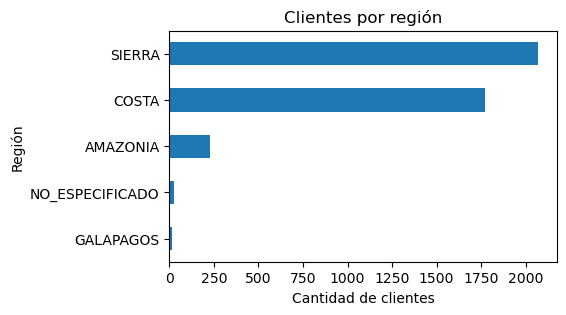

In [17]:
provincia_counts = df_morosidad["region"].value_counts().sort_values()
provincia_counts.plot(kind="barh", figsize=(5,3))
plt.title("Clientes por región")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Región")
plt.show()

La mayor parte dde clientes con cartera vencida se concentran en provincias de la Sierra y Costa, sin embargo esto se puede explicar por que la mayor parte de población y actividad económica del país se concentra en dichas regiones.

Se muestra además en la siguiente gráfica la provincia donde de concentra la mayor parte de clientes con cartera vencida en cada región de Ecuador.

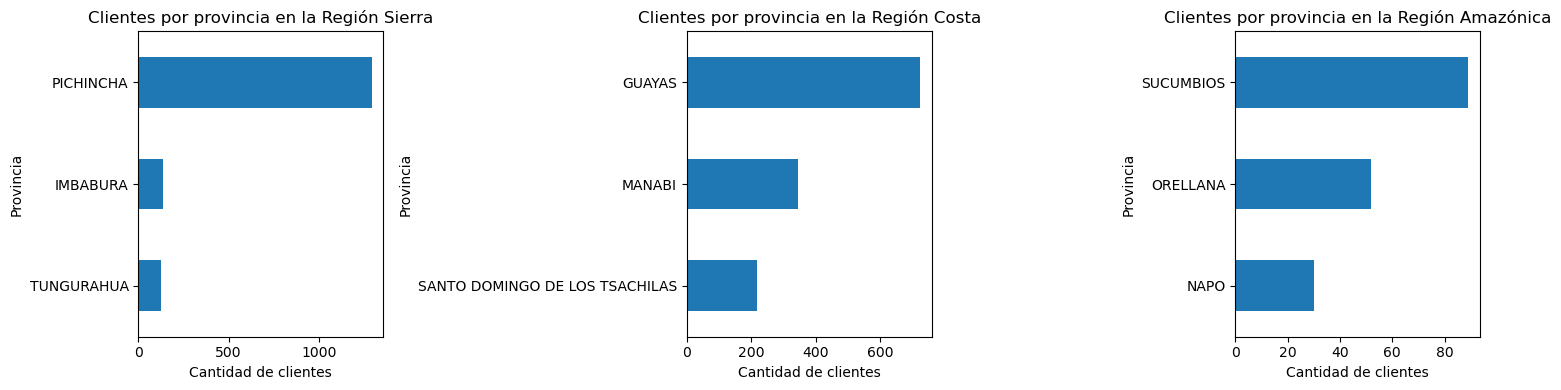

In [18]:
regions = ["SIERRA", "COSTA", "AMAZONIA"]
titles = [
    "Clientes por provincia en la Región Sierra",
    "Clientes por provincia en la Región Costa",
    "Clientes por provincia en la Región Amazónica"
]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, region, title in zip(axes, regions, titles):
    provincia_counts = (
        df_morosidad[df_morosidad["region"] == region]["provincia_cliente"]
        .value_counts()
        .nlargest(3)
        .sort_values()
    )
    
    provincia_counts.plot(kind="barh", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Cantidad de clientes")
    ax.set_ylabel("Provincia")

plt.tight_layout()
plt.show()

Se observan algunos apectos relevantes en cuanto a estos datos, el primero es que el rango de días en mora en el *dataset* está comprendido entre 10 y 60 días, mientras que los montos por vencer y montos vencidos pueden tener valores en cero (0), sin embargo la resta de ambos jamás puede ser cero (0), esto debido a que en el presente conjunto de datos únicamente se contemplan a clientes que cuenten todavía con saldos o valores pendientes en sus préstamos a la fecha de corte del conjunto de datos.

A continuación se analizará si es que existen clientes que tengan al mismo tiempo *montos vencidos* y *montos por vencer* y de ser así se determinará si se trata o no de posibles inconsistencias realizando análisis más exhaustivos de ser el caso.

In [19]:
len(df_morosidad.query("monto_por_vencer != 0 and monto_vencido != 0"))

0

In [20]:
print(len(df_morosidad.query("monto_vencido == 0")))
print(len(df_morosidad.query("monto_por_vencer == 0")))

print()

print(len(df_morosidad.query("tipo_campania == 'DIFERIMIENTO'")))
print(len(df_morosidad.query("tipo_campania == 'NORMALIZACIÓN'")))

2251
1864

2340
1775


In [21]:
resaltado = pd.DataFrame({
    'monto_por_vencer_resaltado': [
        len(df_morosidad.query("tipo_campania == 'DIFERIMIENTO' & monto_por_vencer > 0")),
        len(df_morosidad.query("tipo_campania == 'NORMALIZACIÓN' & monto_por_vencer > 0"))
    ],
    'monto_vencido_resaltado': [
        len(df_morosidad.query("tipo_campania == 'DIFERIMIENTO' & monto_vencido > 0")),
        len(df_morosidad.query("tipo_campania == 'NORMALIZACIÓN' & monto_vencido > 0"))
    ]
}, index=['DIFERIMIENTO', 'NORMALIZACIÓN'])

resaltado

,monto_por_vencer_resaltado,monto_vencido_resaltado
DIFERIMIENTO,1266,1074
NORMALIZACIÓN,985,790


In [22]:
total_normalizacion = df_morosidad.query("tipo_campania == 'NORMALIZACIÓN'")["monto_credito"].sum()
total_diferimiento = df_morosidad.query("tipo_campania == 'DIFERIMIENTO'")["monto_credito"].sum()

print(f"Total monto_credito NORMALIZACIÓN:\t{total_normalizacion:,.2f}")
print(f"Total monto_credito DIFERIMIENTO:\t{total_diferimiento:,.2f}")

Total monto_credito NORMALIZACIÓN:	16,884,500.90
Total monto_credito DIFERIMIENTO:	23,766,911.76


In [23]:
print(len(df_morosidad))

4115


Como se observa en la celda anterior, no existen registros (*clientes*) con *montos por vencer* y al mismo tiempo *montos vencidos*, lo cual indica de manera preliminar que los clientes con *montos por vencer* podrían ser clientes que todavía no caen en **mora** mientras que los clientes con *montos vencidos* serían aquellos que ya están en mora, sin emabrgo al ser este un conjunto de datos que trata sobre clientes en mora y haberse demostrado previamente que el rango de mora para todos y cada uno de los clientes se encuentra entre **10 y 60 días**, este relato no tendría sentido.

### Planteamiento de hipótesis de saldos complementarios: **monto_credito = monto_por_vencer + monto__vencido**

Con el objetivo de ampliar el análisis se procederá a graficar la distribución de *días en mora* para entender su relación con los clientes que están en estado **POR VENCER** o **VENCIDO**. Para ello, en primer lugar se agregará una categoría llamada **estado_mora** con los estados mencionados previamente con el fin de simplificar el análisis.

Adicionalmente, se plantea la **hipótesis** de que **monto_credito = monto_por_vencer + monto_vencido**, misma que se evaluará más a detalle a lo largo del presente documento.

In [24]:
df_morosidad["estado_mora"] = np.where(
    df_morosidad["monto_por_vencer"] != 0, "POR VENCER", "VENCIDO"
)

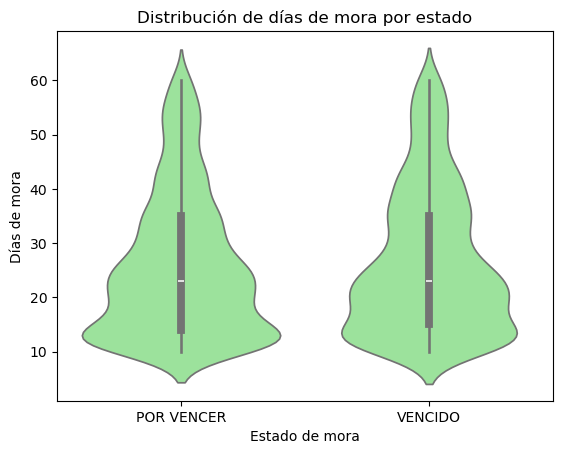

In [25]:
sns.violinplot(
    data=df_morosidad,
    x="estado_mora",
    y="dias_mora",
    color="lightgreen"
)

plt.title("Distribución de días de mora por estado")
plt.xlabel("Estado de mora")
plt.ylabel("Días de mora")
plt.show()

El análisis del boxplot muestra que las distribuciones de días en mora son muy similares entre los clientes con montos “por vencer” y aquellos con montos “vencidos”, tanto a nivel de mediana como de cuartiles. Esto indica que el hecho de que uno de los valores (**monto_vencido** o **monto_por_vencer**) sea cero no significa que el cliente no esté en mora, ni que la otra columna sea realmente cero. Más bien, refleja que el banco segmenta los clientes para resaltar en algunos casos los montos por vencer y en otros los montos vencidos.

Para ello, como primer paso se propone calcular el porcentaje de deuda que resprentan **monto_por_vencer** y **monto_vencido** del monto total (**monto_credito**) por cliente para detectar patrones, así como tratar de inferir porqué el banco busca resaltar un monto u otro para cada cliente, y del mismo modo se calcularán los valores mínimos y máximos en estos porcentajes, así como su distribución para entender cómo se está comportando la deuda y corroborar si hay fundamentos con los que se cumpla la hipótesis planteada previamente de que **monto_credito = monto_por_vencer + monto_vencido** y que el Banco simplemente forza los ceros en uno y solo uno de estos dos parámetros.

In [26]:
df_morosidad["pct_vencido"] = (df_morosidad["monto_vencido"] / df_morosidad["monto_credito"]).round(4)
df_morosidad["pct_por_vencer"] = (df_morosidad["monto_por_vencer"] / df_morosidad["monto_credito"]).round(4)

In [27]:
print("Porcentajes máximos y mínimos (respectivamente) en 'pct_por_vencer'")
print(df_morosidad[df_morosidad["pct_por_vencer"] != 0]["pct_por_vencer"].max()*100, "\t%")
print(df_morosidad[df_morosidad["pct_por_vencer"] != 0]["pct_por_vencer"].min()*100, "\t%")

print("\nPorcentajes máximos y mínimos (respectivamente) en 'pct_vencido'")
print(df_morosidad[df_morosidad["pct_vencido"] != 0]["pct_vencido"].max()*100, "\t%")
print(df_morosidad[df_morosidad["pct_vencido"] != 0]["pct_vencido"].min()*100, "\t%")

Porcentajes máximos y mínimos (respectivamente) en 'pct_por_vencer'
98.97 	%
8.9 	%

Porcentajes máximos y mínimos (respectivamente) en 'pct_vencido'
8.52 	%
0.01 	%


Como se puede ver en los porcentajes de montos por vencer los valores van entre el 8.9% y el 98.97% del total del crédito como máximo, mientras que en los porcentajes de los montos vencidos los mínimos y máximos oscilan entre 0.01% y 8.52%, evidenciándose continuidad entre ambos grupos de porcentajes, por lo cual todo cliente tiene una parte vencida pequeña y una parte por vencer grande, y se puede de momento continuar con la hipótesis de que el sistema decide cual resaltar.

Se grafican a continuación 2 violines para entender la distribución de estos porcentajes y ver que concentración existe en cuanto al porcentaje de deuda que mantienen los clientes respecto del **monto_credito**.

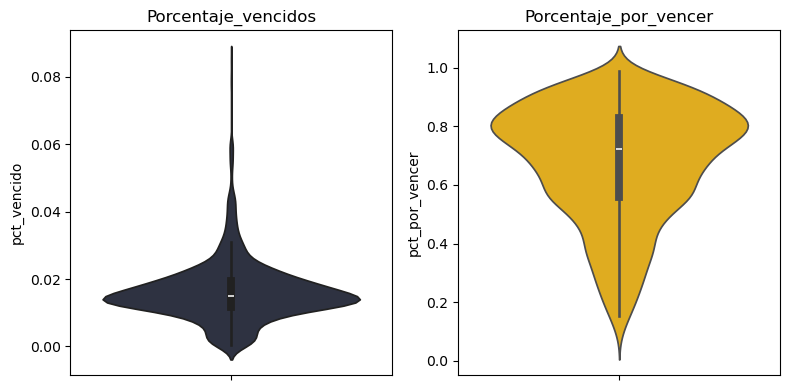

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.violinplot(
    data=df_morosidad.query("pct_vencido != 0"),
    y="pct_vencido",
    ax=axes[0],
    color="#2b3044"
)
axes[0].set_title("Porcentaje_vencidos")

sns.violinplot(
    data=df_morosidad.query("pct_por_vencer != 0"),
    y="pct_por_vencer",
    ax=axes[1],
    color="#ffbb00"
)
axes[1].set_title("Porcentaje_por_vencer")

plt.tight_layout()
plt.show()

Se puede ver en los violines que el porcentaje de deuda en clientes vencidos tiende a ser muy bajo, pues la mayoría de los valores se concentran en un rango cercano al 1% o 2% con pocos casos extremos que superan el 5%, mientras que el porcentaje de deuda en clientes por vencer presenta una distribución mucho más amplia, con una concentración importante entre el 60% y el 80% y una mediana cercana al 70%. De igual manera se refuerza la evidencia de continuidad en porcentajes, reforzando así la hipótesis de saldos complementarios.

### Investigación de saldos complementarios

#### Procesamiento inicial de datos

Se va a crear en primer lugar una **copia del conjunto de datos** con el fin de evitar tener demasiadas variables, así como reflejar los valores reales en **monto_por_vencer** y **monto_vencido** para cada cliente una vez que se decidió aceptar como válida la **hipótesis de valor complementario** según los análisis anteriores dentro de este documento.

Para esto, en el **nuevo dataframe** se van a crear nuevas columnas **por_vencer2** y **vencido2** donde se van a eliminar los ceros (0s) forzados mediante la resta entre **monto_credito** y (**monto_por_vencer** o **monto_vencido**), según corresponda en cada caso.

In [29]:
df_copia = df_morosidad.copy()

df_copia["por_vencer2"] = np.clip(
    np.where(df_copia["monto_por_vencer"] > 0,
             df_copia["monto_por_vencer"],
             df_copia["monto_credito"] - df_copia["monto_vencido"]),
    0, None
)

df_copia["vencido2"] = np.clip(
    np.where(df_copia["monto_vencido"] > 0,
             df_copia["monto_vencido"],
             df_copia["monto_credito"] - df_copia["monto_por_vencer"]),
    0, None
)

In [30]:
df_copia.drop(["monto_por_vencer", "monto_vencido"], axis=1, inplace=True)

A continuación, se procede a completar los ceros (0s) en las nuevas columnas **por_vencer2** y **vencido2**.

In [31]:
df_morosidad[["monto_credito", "monto_por_vencer", "monto_vencido"]].sum() \
    .apply(lambda x: f"{x:,.2f}")

monto_credito       40,651,412.66
monto_por_vencer    15,390,866.66
monto_vencido          257,617.49
dtype: object

In [32]:
df_copia[["monto_credito", "por_vencer2", "vencido2"]].sum() \
    .apply(lambda x: f"{x:,.2f}")

monto_credito    40,651,412.66
por_vencer2      31,821,746.56
vencido2          8,829,666.10
dtype: object

Del mismo modo, se calculan los porcentajes que representan los montos por vencer y vencidos, tanto anteriores, así como con los ceros (0s) completados.

In [33]:
totales1 = df_morosidad[["monto_credito", "monto_por_vencer", "monto_vencido"]].sum()
totales2 = df_copia[["monto_credito", "por_vencer2", "vencido2"]].sum()

print("Porcentajes de 'monto_por_vencer'" \
", 'monto_vencido', 'por_vencer2' y 'vencido2' con relación a 'monto_credito:\n")

print("monto_por_vencer:\t{:,.2%}".format(totales1["monto_por_vencer"] / totales1["monto_credito"]))
print("monto_vencido:\t\t{:,.2%}\n".format(totales1["monto_vencido"] / totales1["monto_credito"]))

print("por_vencer2:\t\t{:,.2%}".format(totales2["por_vencer2"] / totales2["monto_credito"]))
print("vencido2:\t\t{:,.2%}".format(totales2["vencido2"] / totales2["monto_credito"]))

Porcentajes de 'monto_por_vencer', 'monto_vencido', 'por_vencer2' y 'vencido2' con relación a 'monto_credito:

monto_por_vencer:	37.86%
monto_vencido:		0.63%

por_vencer2:		78.28%
vencido2:		21.72%


Una vez que se completaron los **ceros (0s) forzados** y reconstruidos ambos componentes por cliente, es posible tener un nuevo panorama al evidenciarse que el dataset original subestima la magnitud real de la cartera, pues la versión “*resaltada*” muestra solo **$15M** por vencer y **$257K** vencido dado que en cada fila el banco decide exhibir solo una de las dos columnas para evitar doble conteo. No obstante, al reponer el complemento también existe en cada crédito la foto completa de la exposición pendiente cuyos valores son aproximadamente ≈ **$31M** por vencer y **$8.8M** vencido sobre un crédito total de ≈ **$40,651,412.66**, o dicho de manera porcentual: **~78% por vencer** y **~22% vencido**. Esta visión, la cual podría considerarse como “ajustada” es la que se decide emplear para dimensionar y planificar las campañas, pues explica por qué hay espacio para llevar normalización de **2M** a **9M** y diferimiento de **4M** a **15M**, a la vez que evita conclusiones erróneas que surgirían si se analizan solo las columnas “resaltadas” en el presente reporte.

*En la siguiente sección se va a comparar **estado_mora** con las viariables categóricas de este dataset para determinar en qué tipos de perfiles de clientes se va a enfocar el análisis para proponer estrategias de mejora en las campañas de alivio financiero que ayuden al Banco en su recuperación de cartera vencida.*

## Segmentación de clientes para campañas de alivio financiero

### Comparación de **estado_mora** con variables categóricas

Para proseguir con el análisis, se cuentan los valores por cada una de las posibles categorías que influyan y expliquen el porqué del tipo de estado de mora (vencer o vencido).

In [34]:
pd.crosstab(df_morosidad["producto_host"], df_morosidad["estado_mora"])\
    .reindex(columns=["POR VENCER", "VENCIDO"], fill_value=0) \
    .sort_index()

estado_mora,POR VENCER,VENCIDO
producto_host,,
AUTOS,90,77
HABITAR,18,0
MICROFINANZAS,903,394
PRECISO,1179,1372
PRODUCTIVO,40,14
PRODUCTO MUJER,21,7


In [35]:
pd.crosstab(df_morosidad["rango_morosidad"], df_morosidad["estado_mora"])\
    .reindex(columns=["POR VENCER", "VENCIDO"], fill_value=0) \
    .sort_index()

estado_mora,POR VENCER,VENCIDO
rango_morosidad,,
16 - 30 DIAS,890,753
31 - 60 DIAS,688,620
6 - 15 DIAS,673,491


In [36]:
pd.crosstab(df_morosidad["gestor"], df_morosidad["estado_mora"])\
    .reindex(columns=["POR VENCER", "VENCIDO"], fill_value=0) \
    .sort_index()

estado_mora,POR VENCER,VENCIDO
gestor,,
DIGITAL,1892,1572
RED COMERCIAL,359,292


In [37]:
pd.crosstab(df_morosidad["recibe_sueldo_fijo"], df_morosidad["estado_mora"])\
    .reindex(columns=["POR VENCER", "VENCIDO"], fill_value=0) \
    .sort_index()

estado_mora,POR VENCER,VENCIDO
recibe_sueldo_fijo,,
False,1107,945
True,1144,919


In [38]:
pd.crosstab(df_morosidad["region"], df_morosidad["estado_mora"])\
    .reindex(columns=["POR VENCER", "VENCIDO"], fill_value=0) \
    .sort_index()

estado_mora,POR VENCER,VENCIDO
region,,
AMAZONIA,125,104
COSTA,961,813
GALAPAGOS,11,4
NO_ESPECIFICADO,12,13
SIERRA,1142,930


In [39]:
pd.crosstab(df_morosidad["sector_general"], df_morosidad["estado_mora"])\
    .reindex(columns=["POR VENCER", "VENCIDO"], fill_value=0) \
    .sort_index()

estado_mora,POR VENCER,VENCIDO
sector_general,,
AGROPECUARIO,242,171
COMERCIO,722,514
CONSTRUCCIÓN,34,39
EDUCACIÓN Y SALUD,134,139
INDUSTRIA,49,41
INDUSTRIA / MANUFACTURA,141,93
MINERÍA Y EXTRACCIÓN,18,15
SECTOR FINANCIERO,18,21
SECTOR PÚBLICO,104,57


Hasta el momento,en base al análisis de la relación de estas variables categóricas con lo que el banco quiere resltar en cada cliente sus montos por vencer o vencidos se tiene lo siguiente:

**rango_morosidad**: Distribuciones muy parecidas entre “POR VENCER” y “VENCIDO” (ligero sesgo: 31–60 días pesa un poco más en VENCIDO y 6–15 en POR VENCER). No parece ser el driver.

**gestor**: DIGITAL domina en ambos (≈85% en ambos estados). Casi sin diferencia → no explica el “resaltado”.

**recibe_sueldo_fijo**: Proporciones casi idénticas (leve sesgo hacia “False” en VENCIDO). Efecto menor.

**provincia**: Pichincha y Guayas concentran clientes en ambos estados; sin normalizar por base o penetración regional, no se infiere causalidad. Probable efecto de tamaño de mercado.

**sector_general**: Diferencias pequeñas, como por ejemplo, *Servicios* y *Sin actividad económica* algo más en VENCIDO; *Sector público* y *Agropecuario* algo más en POR VENCER.

**producto_host**: Sí muestra asociación real con Cramér’s V ≈ 0.23 y p ≪ 0.001. Es el único con señal clara.

Se va a realizar una análisis adicional con chi-cuadrado para ayudar a determinar el perfil de clientes con mayor incidencia de morosidad para enfocar en ellos la solución planteada al Banco para recuperación de cartera vencida.

In [40]:
from scipy.stats import chi2_contingency


def cramers_v(ct):
    chi2, p, dof, exp = chi2_contingency(ct)
    n = ct.to_numpy().sum()
    k = min(ct.shape)
    return p, np.sqrt(chi2 / (n * (k - 1)))

targets = ["producto_host","rango_morosidad","gestor",
           "recibe_sueldo_fijo","provincia_cliente","sector_general"]

res = []
for col in targets:
    ct = pd.crosstab(df_morosidad[col], df_morosidad["estado_mora"])
    p, v = cramers_v(ct)
    res.append((col, p, v))
pd.DataFrame(res, columns=["variable","p_value","cramers_v"]).sort_values("cramers_v", ascending=False)

,variable,p_value,cramers_v
0,producto_host,3.235350e-45,0.230390
4,provincia_cliente,7.022449e-05,0.119245
5,sector_general,2.159893e-04,0.094939
1,rango_morosidad,2.897559e-02,0.041487
3,recibe_sueldo_fijo,3.477512e-01,0.014637
2,gestor,8.376312e-01,0.003195


El análisis chi-cuadrado muestra una relación estadísticamente significativa entre el tipo de producto **producto_host** y el estado resaltado **POR VENCER** vs **VENCIDO**, con un tamaño de efecto no trivial **Cramér’s V = 0.230** y **p ≪ 0.001**, lo cual además sugiere que la decisión de resaltar uno u otro componente depende principalmente de las características del producto.

Otras variables presentan asociaciones mucho menores, tales como la *provincia* y el *sector económico del cliente* mismas que tienen efectos débiles con **V≈0.12** y **V≈0.095**, respectivamente. El rango de morosidad apenas aporta señal al tener un valor de **V≈0.041** y adicionalmente, ni el *canal de gestión* ni la *condición de sueldo fijo* muestran evidencia relevante.

Es por ello que los resultados indican una orientación más fuerte hacia el **perfil del producto (producto_host)** en lugar de la **antigüedad exacta del atraso** o el **canal**.

### Análisis de Paretto (curvas de concentración)

Se definen las variables y funciones necesarias para construir el Gráfico de Paretto y obtener los índices o coeficientes de Gini.

In [41]:
ID_COL = "codigo_cliente"
VALUE_COL = "vencido2"
GROUPS = ["producto_host", "provincia_cliente"] 


def build_pareto(df_in, value_col=VALUE_COL, id_col=ID_COL):
    d = (df_in[[id_col, value_col]]
         .groupby(id_col, as_index=False)[value_col].sum())
    d = d[d[value_col] > 0].sort_values(value_col, ascending=False).reset_index(drop=True)
    if d.empty:
        return d.assign(rank=[], cum_value=[], cum_value_pct=[], cum_count_pct=[])
    d["rank"] = np.arange(1, len(d) + 1)
    d["cum_value"] = d[value_col].cumsum()
    total = d[value_col].sum()
    d["cum_value_pct"] = d["cum_value"] / total
    d["cum_count_pct"] = d["rank"] / len(d)
    return d


def plot_pareto(pareto_df, title="Curva de concentración (vencido2)"):
    if pareto_df.empty:
        print("No hay datos positivos de vencido para graficar.")
        return
    plt.figure(figsize=(7,5))
    plt.plot(pareto_df["cum_count_pct"]*100, pareto_df["cum_value_pct"]*100)
    plt.plot([0,100],[0,100], linestyle="--")
    plt.xlabel("% de clientes (acumulado)")
    plt.ylabel("% de vencido2 (acumulado)")
    plt.title(title)
    plt.tight_layout()
    plt.show()


def share_top_pct(pareto_df, pct_clients=0.20, value_col=VALUE_COL):
    if pareto_df.empty: 
        return np.nan
    n = int(np.ceil(len(pareto_df) * pct_clients))
    top_sum = pareto_df.iloc[:n][value_col].sum()
    return top_sum / pareto_df[value_col].sum()


def cutoff_for_share(pareto_df, target_share=0.80):
    if pareto_df.empty:
        return np.nan, np.nan
    idx = np.argmax(pareto_df["cum_value_pct"].values >= target_share)
    pct_clients = pareto_df.iloc[idx]["cum_count_pct"]
    return pct_clients, pareto_df.iloc[idx]["cum_value_pct"]


def gini_from_lorenz(pareto_df):
    if pareto_df.empty:
        return np.nan
    x = np.concatenate(([0.0], pareto_df["cum_count_pct"].values))
    y = np.concatenate(([0.0], pareto_df["cum_value_pct"].values))
    area = np.trapz(y, x)
    gini = 1 - 2*area
    return gini

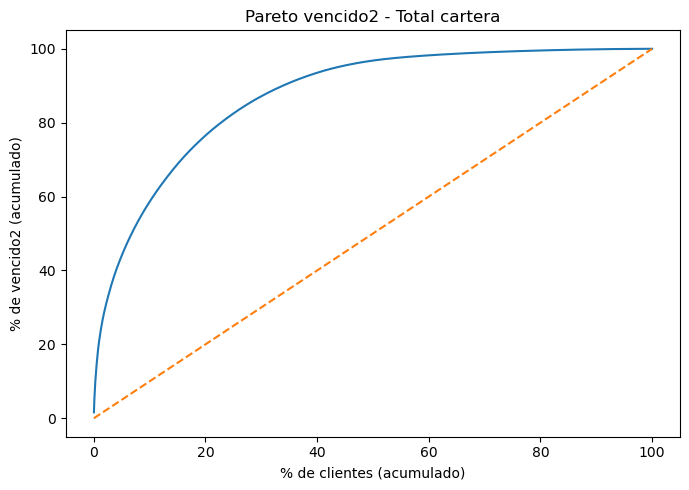

P20-share (%% vencido en top 20%% clientes): 76.53%
%% clientes necesarios para 80%% del vencido: 22.77%
Gini (concentración): -0.746


In [42]:
pareto_all = build_pareto(df_copia)
plot_pareto(pareto_all, title="Pareto vencido2 - Total cartera")

p20_share = share_top_pct(pareto_all, 0.20)
cut_80 = cutoff_for_share(pareto_all, 0.80)
gini_all = gini_from_lorenz(pareto_all)

print(f"P20-share (%% vencido en top 20%% clientes): {p20_share:.2%}")
print(f"%% clientes necesarios para 80%% del vencido: {cut_80[0]:.2%}")
print(f"Gini (concentración): {gini_all:.3f}")

In [43]:
def pareto_summary_by(df_in, by="NombreProductoHost"):
    rows = []
    for g, sdf in df_in.groupby(by, dropna=False, observed=False):
        p = build_pareto(sdf)
        if p.empty:
            rows.append({by: g, "total_vencido2": 0.0, "P20_share": np.nan, 
                         "pct_clientes_para_80": np.nan, "Gini": np.nan, "n_clientes_pos": 0})
            continue
        rows.append({
            by: g,
            "total_vencido2": sdf[VALUE_COL].clip(lower=0).sum(),
            "P20_share": share_top_pct(p, 0.20),
            "pct_clientes_para_80": cutoff_for_share(p, 0.80)[0],
            "Gini": gini_from_lorenz(p),
            "n_clientes_pos": p.shape[0]
        })
    return (pd.DataFrame(rows)
              .sort_values(["total_vencido2"], ascending=False)
              .reset_index(drop=True))

res_prod = pareto_summary_by(df_copia, by="producto_host")
res_prov = pareto_summary_by(df_copia, by="region")
res_gestor = pareto_summary_by(df_copia, by="gestor")

res_prod.head(10)

,producto_host,total_vencido2,P20_share,pct_clientes_para_80,Gini,n_clientes_pos
0,PRECISO,2964354.60,0.743778,0.238338,-0.713705,2551
1,MICROFINANZAS,2915282.91,0.605080,0.342328,-0.601154,1297
2,PRODUCTIVO,1029363.69,0.542640,0.425926,-0.535697,54
3,HABITAR,951448.88,0.430983,0.666667,-0.308274,18
4,AUTOS,608509.16,0.765772,0.233533,-0.728143,167
5,PRODUCTO MUJER,360706.86,0.497956,0.464286,-0.488405,28


In [44]:
def gini_correct_from_df(df, value_col="vencido2", id_col="codigo_cliente"):
    v = (df.groupby(id_col)[value_col].sum()
           .clip(lower=0)
           .to_numpy(dtype=float))
    if v.size == 0 or v.sum() == 0:
        return float("nan")
    v.sort()
    cum = np.cumsum(v)
    lor = np.insert(cum, 0, 0.0) / cum[-1]
    pop = np.arange(0, len(v)+1) / len(v)
    return 1 - 2*np.trapz(lor, pop)

gini = gini_correct_from_df(df_copia, value_col="vencido2", id_col="codigo_cliente")
print(f"Gini (correcto): {gini:.3f}")

Gini (correcto): 0.746


La curva de Pareto evidencia una concentración muy alta del vencido: con un Gini=0.746, el 20% de los clientes explica ≈76.5% del vencido y apenas ≈22.8% de clientes concentran el 80%. Por producto, el volumen se concentra en PRECISO (≈2.96M) y MICROFINANZAS (≈2.92M), seguidos de PRODUCTIVO (≈1.03M) y HABITAR (≈0.95M). En términos de concentración, AUTOS y PRECISO son los más críticos (P20≈76.6% y 74.4%; ≈23–24% de clientes alcanzan 80%), mientras que MICROFINANZAS está más disperso (P20≈60.5%; requiere ≈34% de clientes para 80%) y HABITAR es el menos concentrado (P20≈43.1%; ≈66.7% de clientes para 80%), por lo cual se puede ver que la cartera vencida está fuertemente concentrada y un enfoque sobre el “top” de PRECISO y AUTOS permitiría capturar la mayor parte del riesgo con la mínima cantidad de clientes.

In [45]:
df_morosidad.columns

Index(['codigo_cliente', 'rango_morosidad', 'monto_credito',
       'monto_por_vencer', 'monto_vencido', 'intereses', 'producto_host',
       'dias_mora', 'gestor', 'recibe_sueldo_fijo', 'provincia_cliente',
       'region', 'sector_general', 'tipo_campania', 'estado_mora',
       'pct_vencido', 'pct_por_vencer'],
      dtype='object')

#### Mapas de calor por *gestor* y *producto_host*

Se realizan mapas de calor con el fin de determinar la correlación entre campañas de alivio financiero y tipo de crédito otorgado, tanto para gestión por canales digitales como comerciales.

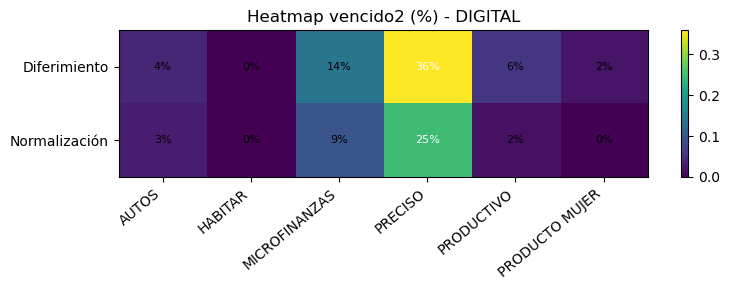

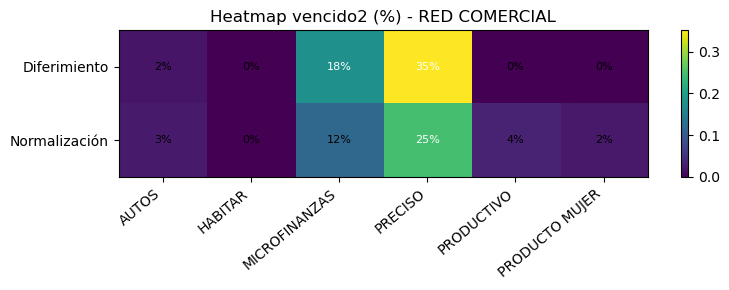

producto_host,AUTOS,HABITAR,MICROFINANZAS,PRECISO,PRODUCTIVO,PRODUCTO MUJER
tipo_campania,,,,,,
Diferimiento,0.019875,0.0,0.176725,0.351202,0.000000,0.000000
Normalización,0.025971,0.0,0.119130,0.247498,0.035567,0.024032


In [46]:
df_temp = df_morosidad.copy()
if "vencido2" not in df_temp.columns: df_temp["vencido2"] = df_temp["monto_vencido"].clip(lower=0)

df_temp["tipo_campania"] = df_temp["dias_mora"].\
    apply(lambda d: "Normalización" if 10<=d<=20 else ("Diferimiento" if 21<=d<=60 else "Fuera"))

def heat_by_channel(df_temp, canal, normalize=True):
    piv = pd.pivot_table(
        df_temp[df_temp["gestor"]==canal],
        index="tipo_campania",
        columns="producto_host",
        values="vencido2",
        aggfunc="sum",
        fill_value=0.0,
        observed=False
    )
    
    if normalize and piv.values.sum()>0: piv = piv / piv.values.sum()

    plt.figure(figsize=(8,3))
    im = plt.imshow(piv.values, aspect="auto")
    plt.xticks(range(piv.shape[1]), piv.columns, rotation=40, ha="right")
    plt.yticks(range(piv.shape[0]), piv.index)
    plt.title(f"Heatmap vencido2{" (%)" if normalize else ""} - {canal}")
    for i in range(piv.shape[0]):
        for j in range(piv.shape[1]):
            val = piv.values[i,j]; txt = f"{val:.0%}" if normalize else f"{val:,.0f}"
            plt.text(j, i, txt, ha="center", va="center",
                     color="white" if val>piv.values.max()/2 else "black", fontsize=8)
    plt.colorbar(im); plt.tight_layout(); plt.show()
    return piv

heat_by_channel(df_temp, "DIGITAL", normalize=True)
heat_by_channel(df_temp, "RED COMERCIAL", normalize=True)

Se puede ver en el anterior mapa de calor que el **monto_vencido** se concentra principalmente en *PRECISO* en ambos canales, es decir, alrededor de 35% en *Diferimiento* y 25% en *Normalización*. El segundo foco es *MICROFINANZAS*, especialmente en *Diferimiento* con un aproximado de 14% en Digital y 18% en Red Comercial.

El resto de productos aporta en menor magnitud, con *AUTOS* entre el 2% y 4%, *PRODUCTIVO* entre 0% y 6%, *PRODUCTO MUJER* en menos del 2%, y HABITAR ronda el 0%, por lo que se bere priorizar Diferimiento–PRECISO en ambos canales, Normalización–PRECISO en vía Digital y Diferimiento–MICROFINANZAS con mayor empuje en Red Comercial. Por último, el producto HABITAR puede omitirse y AUTOS/PRODUCTIVO tratarse con campañas puntuales y dirigidas.

### Análisis de segmentación con modelo ML **No Supervisado**

Cómo último análisis para segmentar el enfoque principal de las campañas, se realiza un modelo de segmentación simple mediante aprendizaje no supervisado para terminar de perfilar a los clientes con mayor riesgo de incumplimiento.

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = df_morosidad.copy()
if "vencido2" not in df.columns: df["vencido2"] = df["monto_vencido"].clip(lower=0)

df["pct_vencido"]  = (df["vencido2"]/df["monto_credito"])\
    .replace([np.inf,-np.inf], np.nan).fillna(0).clip(0,5)

df["interes_rate"] = (df["intereses"]/df["monto_credito"]).\
    replace([np.inf,-np.inf], np.nan).fillna(0).clip(0,5)

df["log_credito"]  = np.log1p(df["monto_credito"])

X = df[["dias_mora","pct_vencido","interes_rate","log_credito"]].to_numpy()
X = StandardScaler().fit_transform(X)

km = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = km.fit_predict(X)

perfil = df.groupby("cluster").agg(
    n=("cluster","size"),
    dias_mora=("dias_mora","median"),
    pct_vencido=("pct_vencido","median"),
    interes_rate=("interes_rate","median"),
    credito_med=("monto_credito","median"),
    vencido_total=("vencido2","sum")
).sort_values("vencido_total", ascending=False)

tab_camp  = pd.crosstab(df["cluster"], df.get("tipo_campania", df.get("Campaña")))
tab_canal = pd.crosstab(df["cluster"], df["gestor"])

display(perfil)
display(tab_camp)
display(tab_canal)

,n,dias_mora,pct_vencido,interes_rate,credito_med,vencido_total
cluster,,,,,,
1,1139,20.0,0.017073,0.023929,6000.0,146060.26
0,1071,20.0,0.000000,0.013213,13717.0,61781.00
3,837,46.0,0.000000,0.017374,7249.0,46418.99
2,1068,19.0,0.000000,0.016296,4804.0,3357.24


tipo_campania,DIFERIMIENTO,NORMALIZACIÓN
cluster,,
0,503,568
1,558,581
2,442,626
3,837,0


gestor,DIGITAL,RED COMERCIAL
cluster,,
0,903,168
1,960,179
2,904,164
3,697,140


Según el análisis mediante agrupación por clústeres se confirman tres frentes claros por prioridad e intensidad.

En el caso de los clústeres 1 y 0 son tempranos con mayor aporte al tipo de clientes **Vencidos** y fuerte presencia en el **Canal Digital**, pues concentran la mayor parte del riesgo y en ellos se podría enfocar la campaña de Normalización para recuperación de cartera vencida e intentar con **Diferimiento** si se superan 20 días en mora.

Por otro lado, el clúster 3, es decir, cliantes con mora tardía, rondando los 46 días, se alinea a campañas de **Diferimiento** con refuerzo de tipo de gestión en **Red Comercial**.

Sin emabargo, también se observa que el cluster 2 aporta muy poco al vencido y se gestiona con recordatorios digitales.

### Elección de segmentación de clientes para campañas de alivio financiero

Al realizar el análisis previo con **Pareto**, **Mapas de Calor** y segmentación no supervisada con **K-Means**, se obtuvo que Coeficiente de Gini en Pareto fue de 0.746. Los mapas de calor muestran que el vencido está altamente concentrado y se ubica principalmente en **PRECISO** y luego en **MICROFINANZAS**, con cruces críticos en **Diferimiento–PRECISO** y **Normalización–PRECISO con Canal Digital**, más **Diferimiento–MICROFINANZAS** apoyado por **Red Comercial**.

La segmentación traduce eso en que se debería priorizar el top 20%–23% de clientes, es decir los clústers 1 y 0 por **Normalización en Canal Digital** y atender los tardíos (cluster 3) con **Diferimiento** y gestión humana selectiva, por lo que el plan de acción se enfoca principalmente en los productos, canales y grupos mencionados con el fin de maximizar la recuperación de cartera vencida con el mínimo esfuerzo operativo.

## Plan de acción para recuperación de cartera vencida

Como se vio anteriormente, según el Análisis de Paretto, se va a enfocar en el 20% clientes que concentra la mayor cantidad de cartera vencida y en base a los clústeres obtenidos mediante el **modelo no-supervisado de K-Means** se proponen estrategias personalizadas para cada uno de los 4 grupos o frentes de clientes que forman parte de dicha concentración.

También se va a considerar que cambiar o ajustar de las campañas de **diferimiento** y **normazlización** según la realidad de cada tipo de cliente, priorizando además que los clientes que están en **normalización**, los cuales son de menor riesgo para el Banco no caigan -en la medida de lo posible en **diferimiento**. Esto se lo realiza con el fin de buscar una solución amigable que no perjuique ni sus intereses ni los del Banco.

### Frente A: PRECISO (Créditos de consumo)

En este caso tanto para campañas de diferimiento como se normalización se recomienda priorizar el resolver la deuda mediante canales de autogestión y por red comercial solo si es estritctamente necesario.

- **Normalización**: Se pueden reprogramar cuotas según las necesidades del cliente renegociando el interés por estar en mora sin afectar el capital adeudado y se lo puede manejar mediante autogestión en el portal de Banca en Línea ofreciendo diferentes opciones según la capacidad de pago, nuevamente, sin afectar mucho el interés a mayor plazo e incluso perdonar al final de la deuda hasta un máximo de 1 a 3 cuotas, dependiendo del monto y plazo que adeude al momento en caso de que el cliente haya cumplido al pie de la letra con su nuevo plan de pagos solicitado mediante el canal de autogestión.

- **Diferimiento**: Se puede pausar el cobro de la deuda por hasta 3 meses y volver a cero (0) la variable **dias_mora** para que el interés en mora se perdone y únicamente se considere el interés nominal, aunque a cambio de eso se aumenta el monto de cuota debido al tiempo de espera, aunque con la posibilidad de que si el cliente cumple en tiempo y forma con el 60% de cuotas restantes de su crédito, se puede en manera de compensasión regresar al monto de cuota original previo a que caiga en mora y al igual que en diferimiento perdonar un máximo de 1 a 2 coutas finales premiando así el buen "comportamiento" del cliente, sin embargo si este vuelve a incurrir en un atraso se perderían los beneficios y las cuotas se incrementarían nuevamente. De igual modo se lo puede manejas mediante autogestión en la Banca en Línea y mediante Red Comercial para montos altos o en caso de que el cliente quiera negociar con algún término en específico.

Se espera que esta solución tenga una alta probabilidad de éxito además de un bajo costo operativo.

### Frente B: Microfinanzas (Créditos a microempresarios/emprendedores/informales)

- **Normalización**: Se puede ofrecer flexibilidad en fechas de pago, y ajustes pequeños en sus cuotas restantes, priorizando canal digital primero y en caso de no obtener respuesta, se puede recurrir a un canal de gestión humano.

- **Diferimiento**: Se puede negociar de manera más personalizada, con acompañamiento en persona al cliente, -dado que este tipo de perfil es más disperso- realizar ajustes de la deuda con un mayor plazo y condonar los intereses en mora de manera parcial, según el monto del crédito.

### Frente C: Clientes en mora tardía

- **Normalización:** Opción prácticamente descartada, pues ya no es efectiva al hablar de clientes con varios días en mora.

- **Diferimiento:** En este caso si se deberá pausar las obligaciones vencidas de manera obligatoria por hasta 3 meses y priorizar la gestión en persona con el cliente para poderle ofrecer alternativas lo más personalizadas posibles según su realidad y disposición, pues acá ya lo que se busca es que el **Banco** no pierda el crédito aunque su rentabilidad por cobranza baje.

### Frente D: Clientes en mora temprana con montos pequeños

- **Normalización digital fuerte:** En este caso se prioriza el canal digital frente a la gestión en persona al tratarse de montos pequeños y con pocos días en mora, para lo que se pueden ofrecer ajustes mínimos en montos además de incentivos por normalizar temprano, como podría ser el no incrementar el interés y no reportar al buró de crédito especiamente si el cliente tiene un buen historial crediticio previo a cambio de que el cliente cumpla al pie de la letra con sus obligaciones en adelante.

- **Diferimiento**: En caso de que el cliente no responda y se pasen los 20 días en mora.

Esta estrategia se considera más de tipo preventivo para evitar la situación con dichos clientes llegue a escalar.

## Métricas/KPIs para medir el impacto de las soluciones propuestas